In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Bank_Marketing_Campaign.csv')
df

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,id_27290,58.0,admin.,married,secondary,no,567.0,yes,no,cellular,2,feb,99.0,2.0,265.0,3,other,0
31643,id_20428,51.0,management,married,tertiary,no,1072.0,no,no,unknown,20,jun,31.0,7.0,NaN,0,unknown,0
31644,id_44679,41.0,unemployed,married,primary,no,242.0,yes,no,unknown,23,may,89.0,2.0,NaN,0,unknown,0
31645,id_4841,48.0,services,married,secondary,no,2699.0,no,no,cellular,11,aug,216.0,6.0,NaN,0,unknown,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [4]:
null_value_percentage = (df.isnull().sum()/df.shape[0])*100
null_value_percentage.sort_values(ascending = False)

days_since_prev_campaign_contact    81.622271
customer_age                         1.955952
balance                              1.260783
last_contact_duration                0.982716
marital                              0.473979
personal_loan                        0.470819
num_contacts_in_campaign             0.353904
id                                   0.000000
month                                0.000000
prev_campaign_outcome                0.000000
num_contacts_prev_campaign           0.000000
communication_type                   0.000000
day_of_month                         0.000000
housing_loan                         0.000000
default                              0.000000
education                            0.000000
job_type                             0.000000
term_deposit_subscribed              0.000000
dtype: float64

In [5]:
df.nunique()

id                                  31647
customer_age                           77
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              6563
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1447
num_contacts_in_campaign               46
days_since_prev_campaign_contact      511
num_contacts_prev_campaign             41
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
cat_cols = [df.columns[i] 
            for i in range(1, df.shape[1]-1)
            if df.iloc[:,i].dtype=='O']
cat_cols

['job_type',
 'marital',
 'education',
 'default',
 'housing_loan',
 'personal_loan',
 'communication_type',
 'month',
 'prev_campaign_outcome']

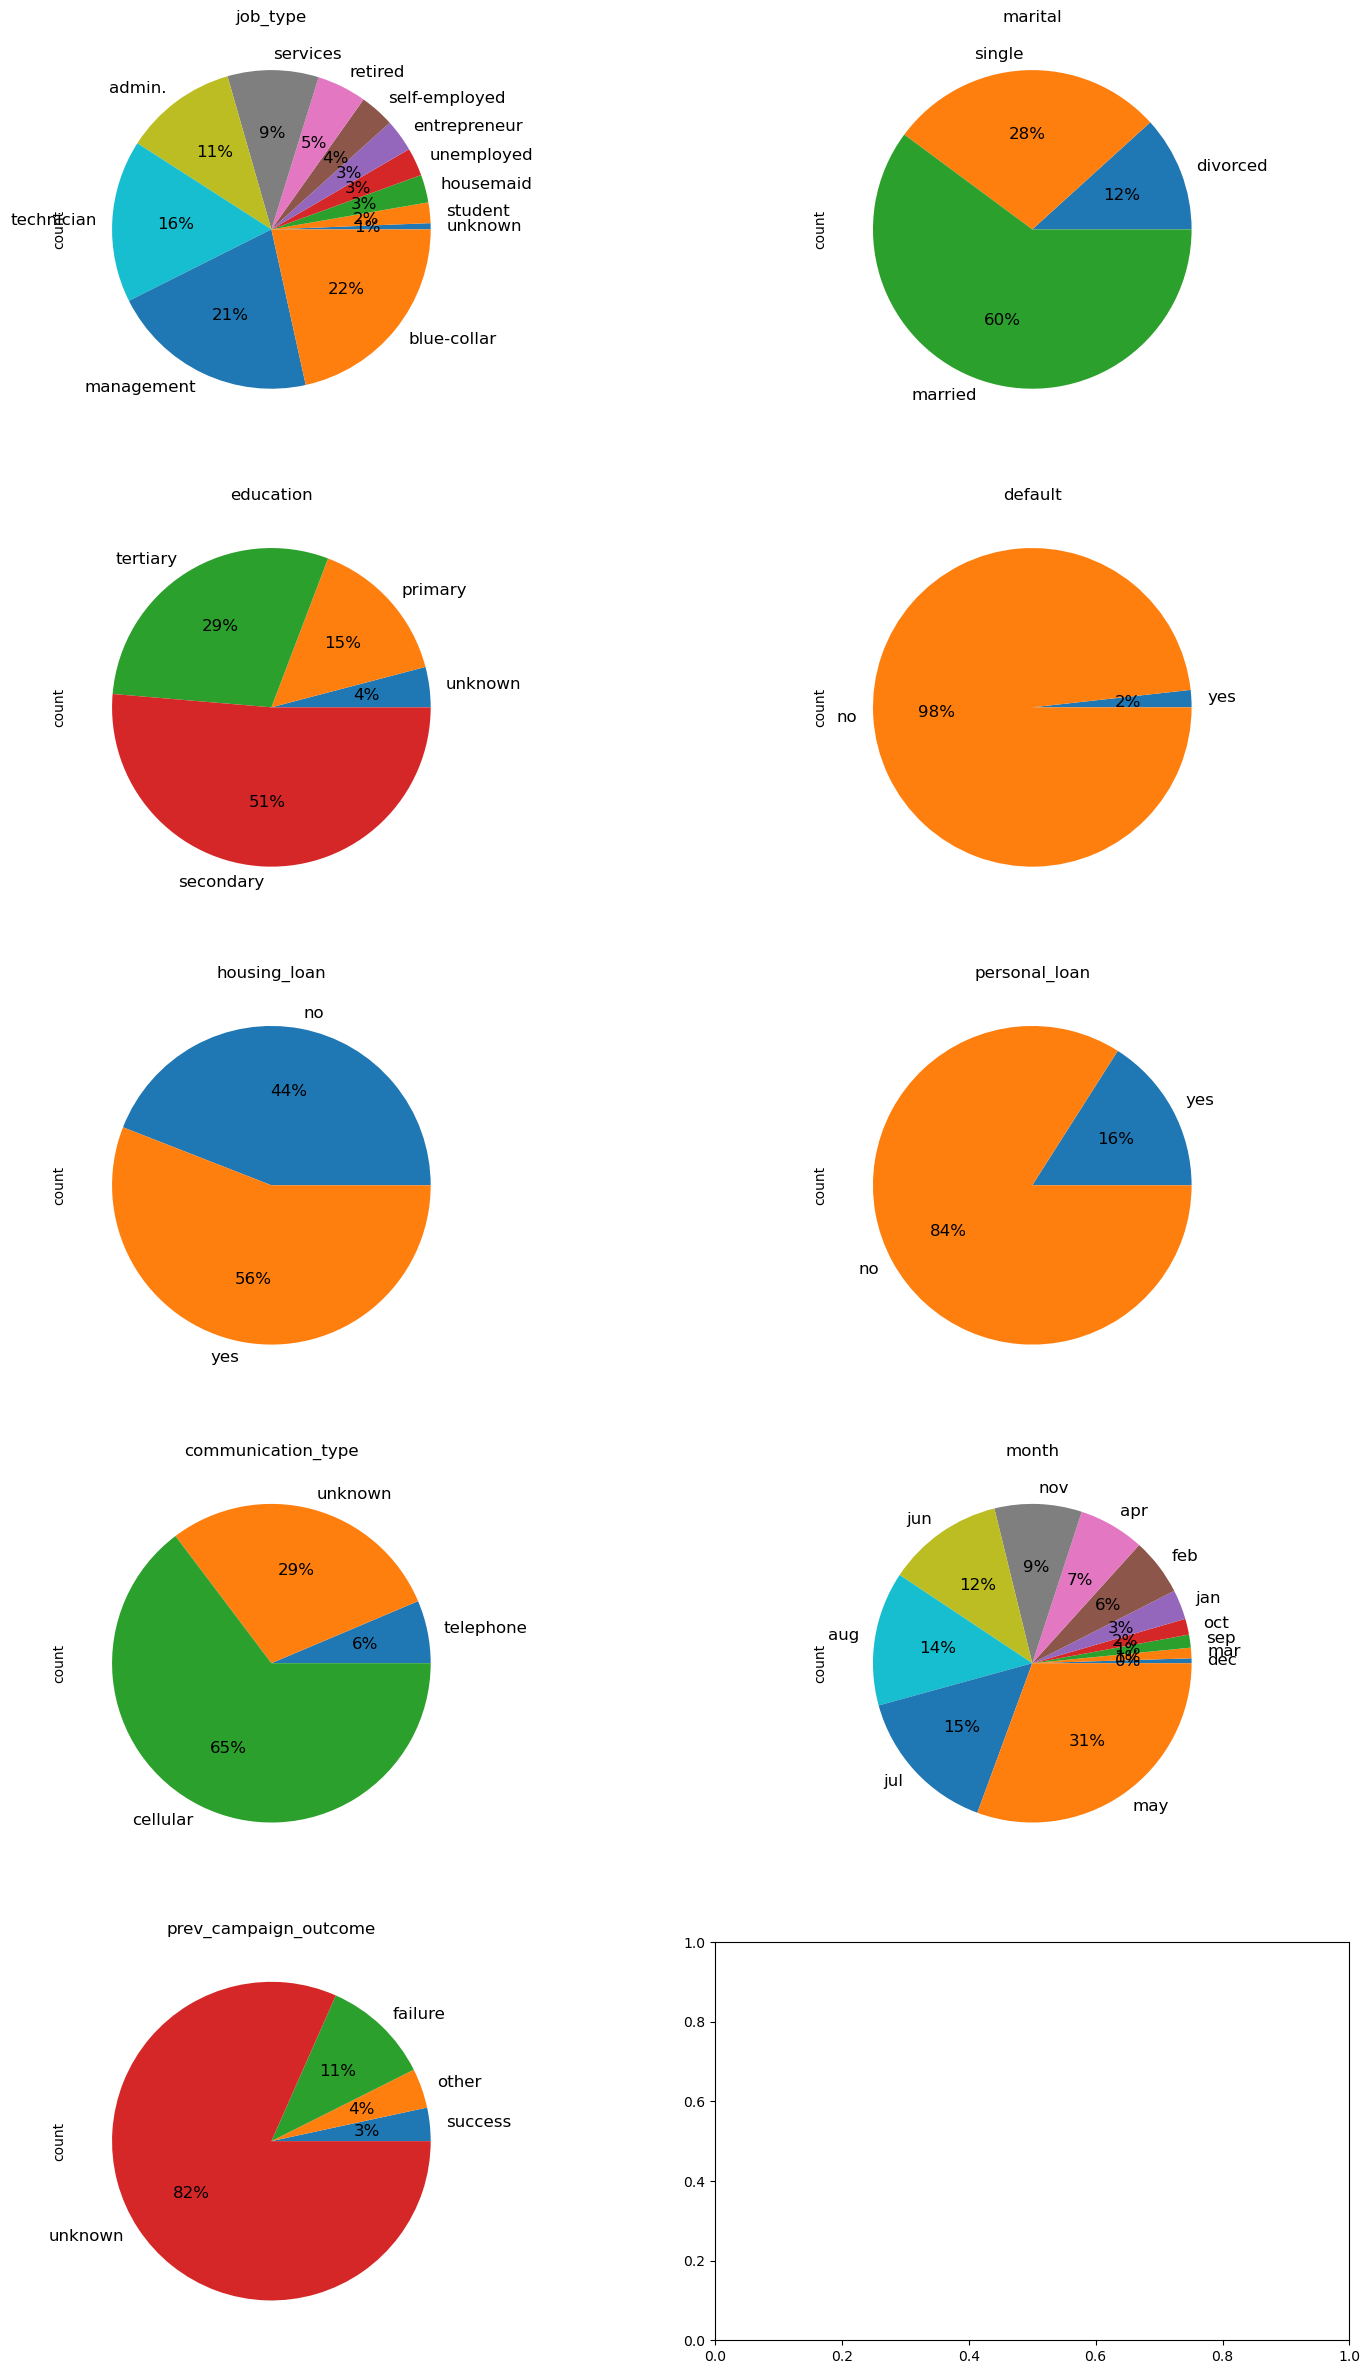

In [8]:
fig, axes = plt.subplots(5, 2, figsize=(18, 30))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, column in enumerate(df[cat_cols]):
    df[column].value_counts()[::-1].plot(kind='pie', ax=axes[i], title=column, autopct='%.0f%%', fontsize=12)

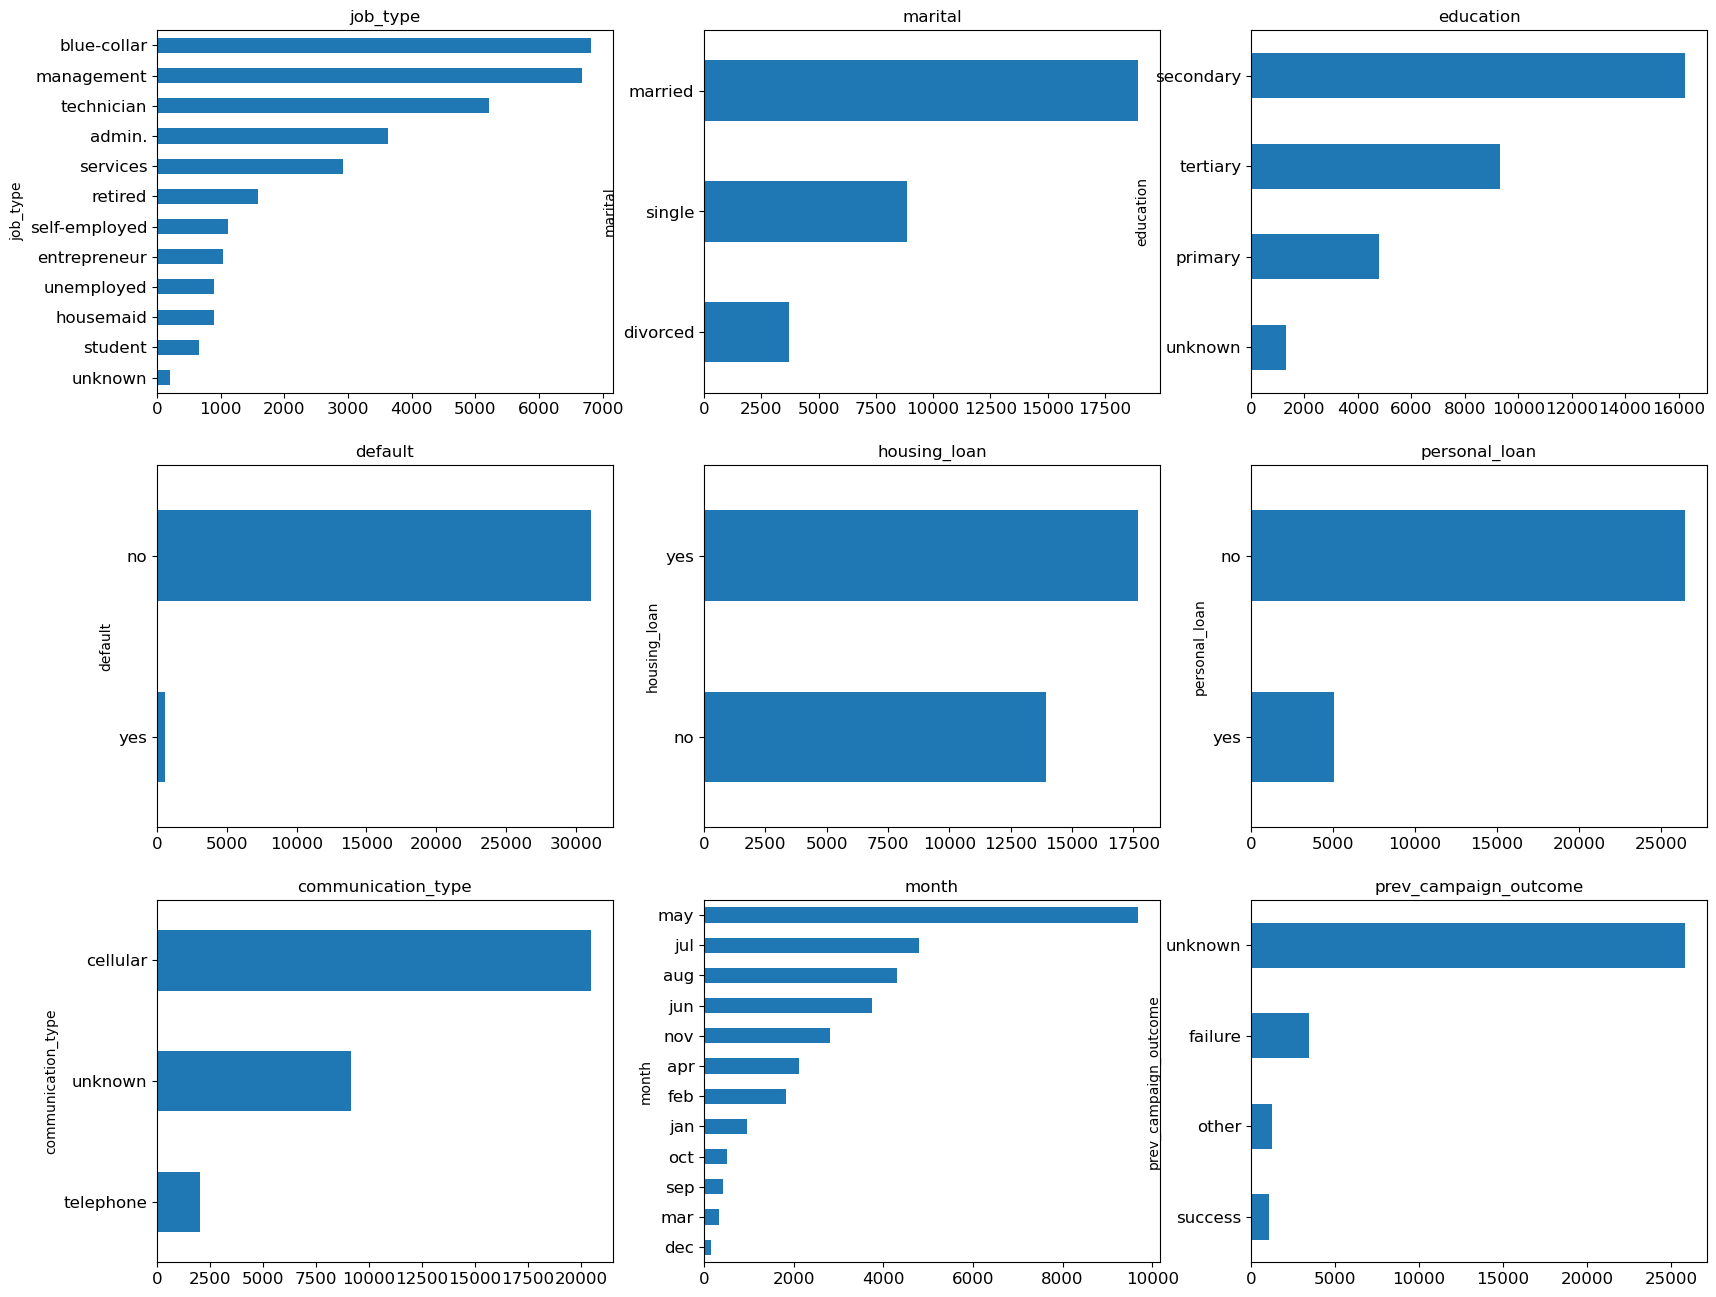

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(20,16))

axes = [ax for axes_rows in axes for ax in axes_rows]

for i, column in enumerate(df[cat_cols]):
    df[column].value_counts()[::-1].plot(kind='barh', ax=axes[i], title=column, fontsize=12)

In [10]:
features = [c for c in df.columns if c not in ['id', 'term_deposit_subscribed']]
num_cols = [c for c in features if c not in cat_cols]
num_cols

['customer_age',
 'balance',
 'day_of_month',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact',
 'num_contacts_prev_campaign']

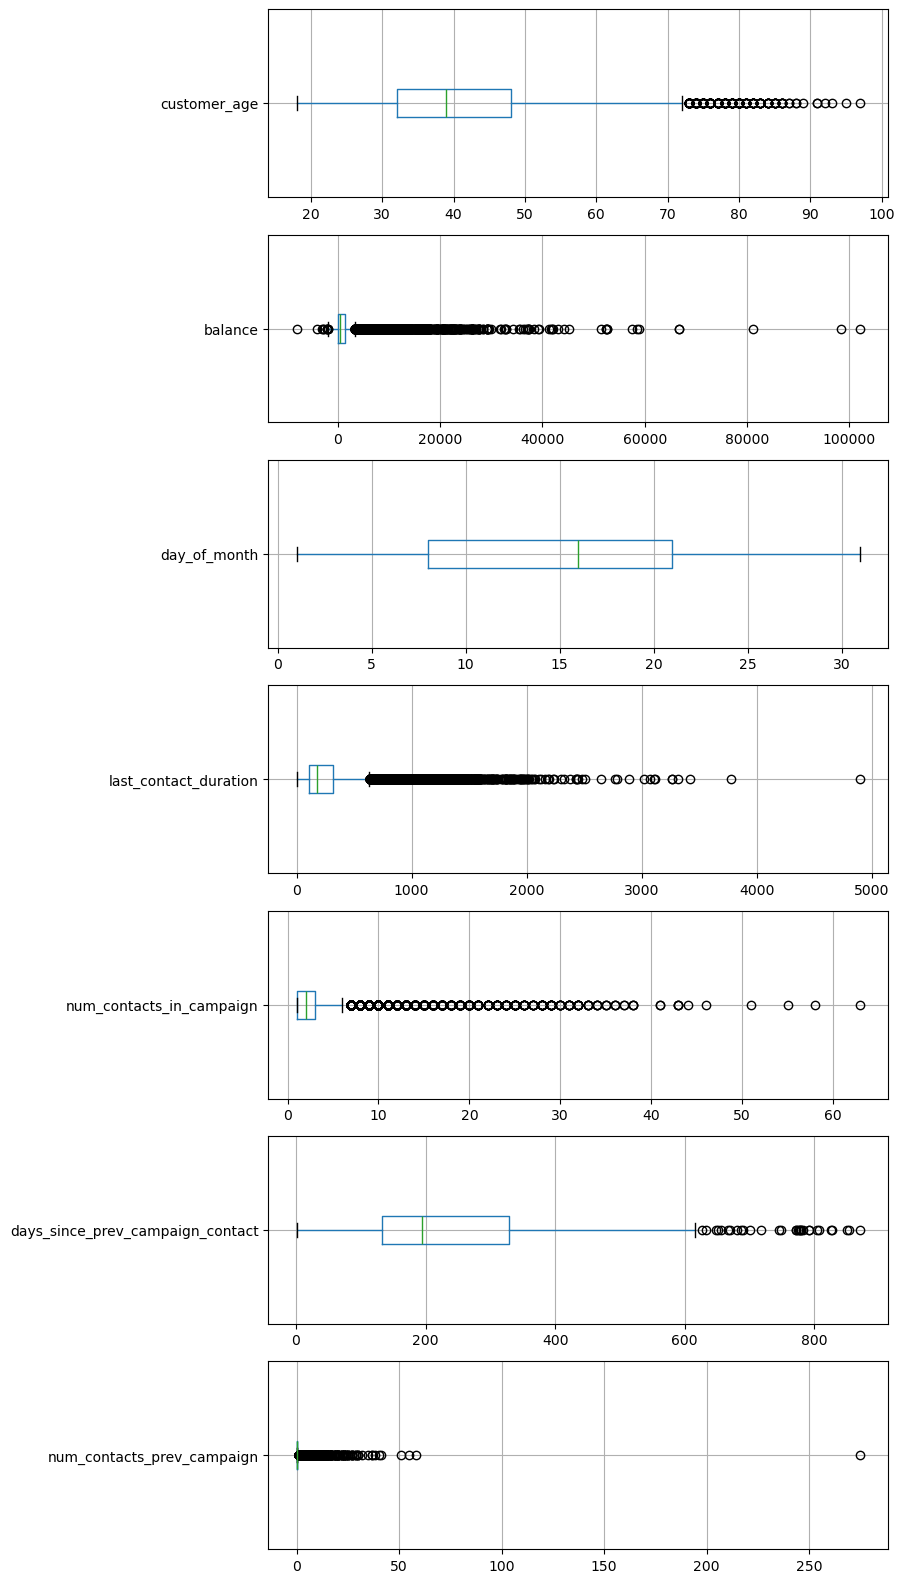

In [11]:
fig, axes = plt.subplots(7, 1, figsize=(8,20))
for i, c in enumerate(df[num_cols]):
    df[[c]].boxplot(ax=axes[i], vert=False)

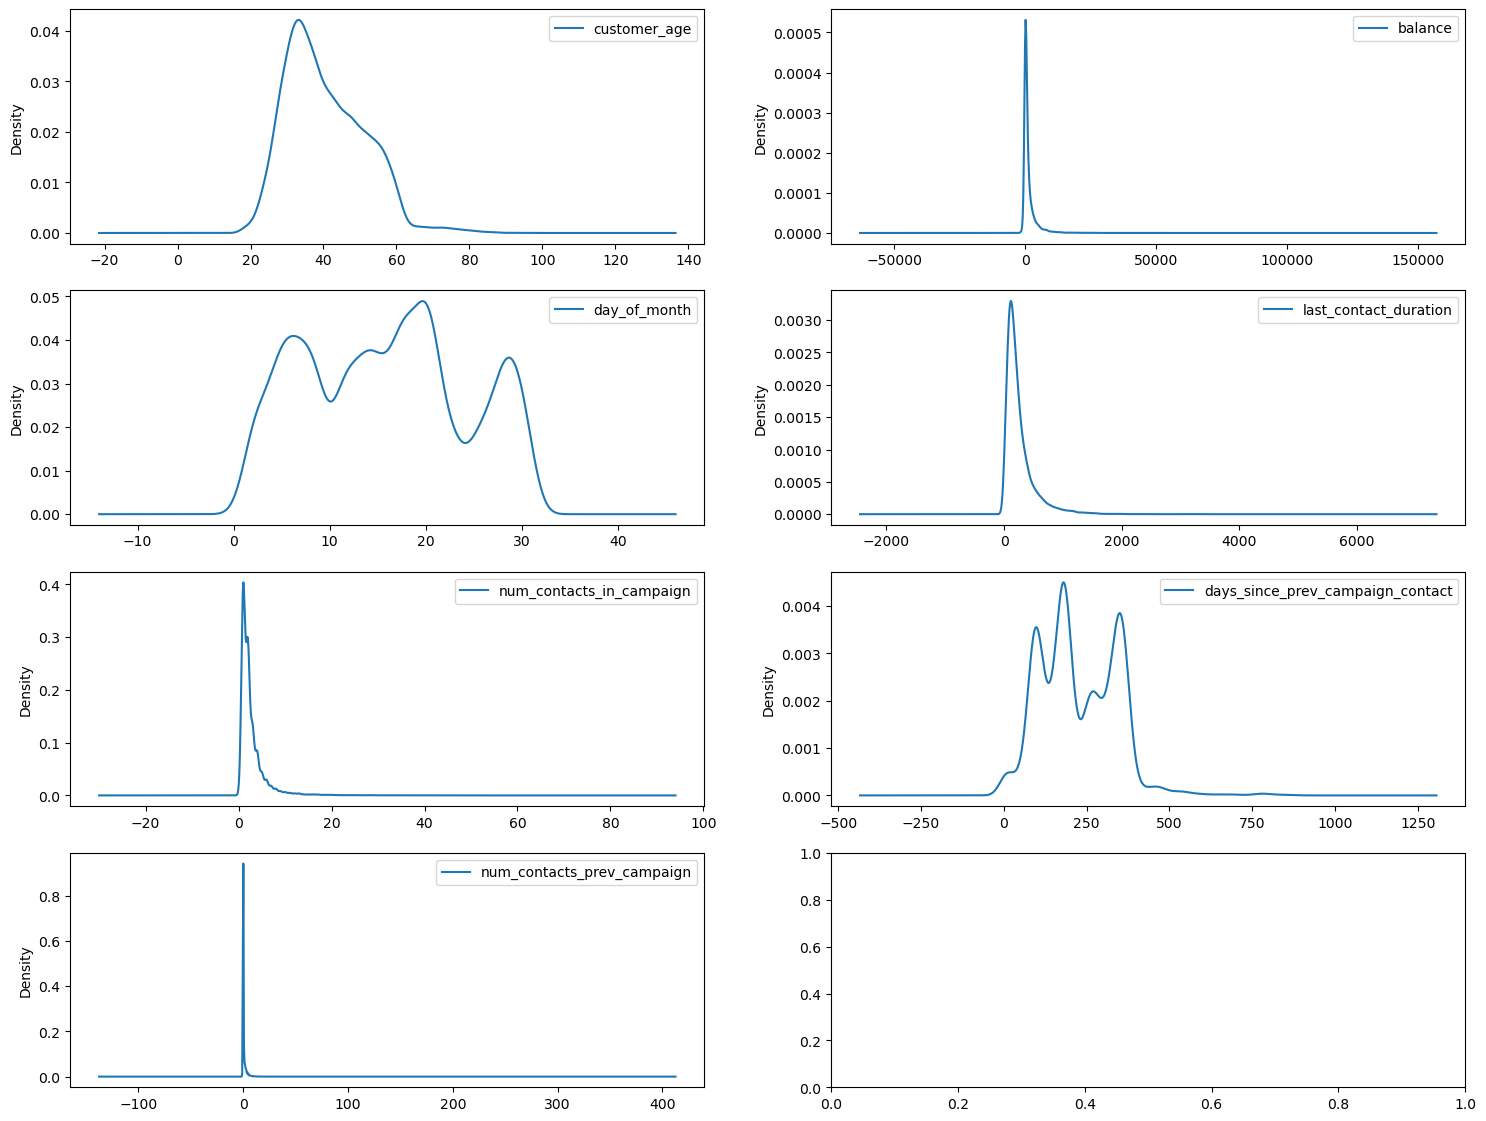

In [12]:
fig, axes = plt.subplots(4, 2, figsize=(18,14))
axes = [ax for axes_rows in axes for ax in axes_rows]

for i, c in enumerate(num_cols): 
    plot = df[[c]].plot(kind='kde', ax=axes[i])